In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
df = pd.read_csv("train_data.csv")
df.head()

,Lat,Long_,Deaths,Case_Fatality_Ratio
0,33.93911,67.709953,NaN,3.779217
1,41.15330,20.168300,NaN,1.077234
2,28.03390,1.659600,NaN,2.536905
3,42.50630,1.521800,165.0,0.345543
4,-11.20270,17.873900,NaN,1.836434


In [52]:
df.isnull().sum()

Lat                      91
Long_                    91
Deaths                 1558
Case_Fatality_Ratio      44
dtype: int64

In [53]:
df.shape

(4016, 4)

In [54]:
df['Lat'] = df['Lat'].fillna(df['Lat'].median())
df['Long_'] = df['Long_'].fillna(df['Long_'].median())


In [55]:
df = df.dropna(subset=['Case_Fatality_Ratio'])

In [56]:
df.isnull().sum()

Lat                       0
Long_                     0
Deaths                 1556
Case_Fatality_Ratio       0
dtype: int64

In [57]:
null = df[~df['Deaths'].isnull()]

In [58]:
null.head()

,Lat,Long_,Deaths,Case_Fatality_Ratio
3,42.5063,1.5218,165.0,0.345543
5,-71.9499,23.3470,0.0,0.000000
6,17.0608,-61.7964,146.0,1.603338
9,-35.4735,149.0124,138.0,0.061360
11,-12.4634,130.8456,84.0,0.081552


In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor

poly = PolynomialFeatures()
DT = DecisionTreeRegressor(random_state=0)
LR = LinearRegression()

**Linear Regression**

In [60]:
X = null.drop('Deaths',axis='columns')
Y = null['Deaths']

In [61]:
xtrain_null,xtest_null,ytrain_null,ytest_null = train_test_split(X,Y,test_size=0.2,random_state=42)

In [62]:
LR.fit(xtrain_null,ytrain_null)

LinearRegression()

In [63]:
ypred_lr_null = LR.predict(xtest_null)

In [64]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print(mean_squared_error(ytest_null,ypred_lr_null))
print(mean_absolute_error(ytest_null,ypred_lr_null))

3295.693086249361
48.76168462308372


**Polynomial Regression**

In [65]:
xtrain_poly_null = poly.fit_transform(xtrain_null)
xtest_poly_null = poly.fit_transform(xtest_null)

In [66]:
poly_LR = LinearRegression()

poly_LR.fit(xtrain_poly_null,ytrain_null)

LinearRegression()

In [67]:
ypred_poly_null_lr = poly_LR.predict(xtest_poly_null)

In [68]:
print(mean_absolute_error(ytest_null,ypred_poly_null_lr))

43.88114674741203


**Tuning**

In [69]:
poly_LR_grid = LinearRegression(fit_intercept=False,positive=True)

In [70]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

grid = GridSearchCV(poly_LR_grid,grid_params,cv=5)

grid.fit(xtrain_poly_null,ytrain_null)
grid.best_params_

{'fit_intercept': False, 'positive': True}

In [71]:
poly_LR_grid.fit(xtrain_poly_null,ytrain_null)

LinearRegression(fit_intercept=False, positive=True)

In [72]:
ypred_poly_lr_null_grid = poly_LR_grid.predict(xtest_poly_null)

In [73]:
print(mean_absolute_error(ytest_null,ypred_poly_lr_null_grid))

48.7350084942183


**filling the death values**

In [74]:
df_poly_features = poly.transform(df.drop('Deaths',axis='columns'))

In [75]:
df['Deaths predicted'] = poly_LR.predict(df_poly_features)

In [76]:
df['Deaths'].max()

np.float64(200.0)

In [77]:
df['Deaths'] = df['Deaths'].fillna(df['Deaths predicted'])

In [78]:
df['Deaths'] = round(df['Deaths'])

In [79]:
df.drop('Deaths predicted',axis='columns',inplace=True)

In [80]:
df.head()

,Lat,Long_,Deaths,Case_Fatality_Ratio
0,33.93911,67.709953,549.0,3.779217
1,41.15330,20.168300,142.0,1.077234
2,28.03390,1.659600,268.0,2.536905
3,42.50630,1.521800,165.0,0.345543
4,-11.20270,17.873900,246.0,1.836434


In [81]:
df.loc[df['Deaths'] < 0,'Deaths'] = 0

In [82]:
df.to_csv('cleanedata.csv')

In [83]:
df['CFR'] = df['Case_Fatality_Ratio'] / 100

In [84]:
df['confirmed cases'] = df['Deaths'] / df['CFR']

In [85]:
df.head()

,Lat,Long_,Deaths,Case_Fatality_Ratio,CFR,confirmed cases
0,33.93911,67.709953,549.0,3.779217,0.037792,14526.819746
1,41.15330,20.168300,142.0,1.077234,0.010772,13181.912127
2,28.03390,1.659600,268.0,2.536905,0.025369,10564.052898
3,42.50630,1.521800,165.0,0.345543,0.003455,47751.000004
4,-11.20270,17.873900,246.0,1.836434,0.018364,13395.528496


In [86]:
df['confirmed cases'] = round(df['confirmed cases'])

In [87]:
df.head()

,Lat,Long_,Deaths,Case_Fatality_Ratio,CFR,confirmed cases
0,33.93911,67.709953,549.0,3.779217,0.037792,14527.0
1,41.15330,20.168300,142.0,1.077234,0.010772,13182.0
2,28.03390,1.659600,268.0,2.536905,0.025369,10564.0
3,42.50630,1.521800,165.0,0.345543,0.003455,47751.0
4,-11.20270,17.873900,246.0,1.836434,0.018364,13396.0


In [88]:
df.drop('CFR',axis=True,inplace=True)

In [89]:
df.head()

,Lat,Long_,Deaths,Case_Fatality_Ratio,confirmed cases
0,33.93911,67.709953,549.0,3.779217,14527.0
1,41.15330,20.168300,142.0,1.077234,13182.0
2,28.03390,1.659600,268.0,2.536905,10564.0
3,42.50630,1.521800,165.0,0.345543,47751.0
4,-11.20270,17.873900,246.0,1.836434,13396.0


In [90]:
df['confirmed cases'] = df['confirmed cases'].fillna(0)

In [91]:
df.to_csv('cleanedata.csv')

In [92]:
from sklearn.metrics import r2_score

r2_train = r2_score(ytrain_null, poly_LR.predict(xtrain_poly_null))
r2_test = r2_score(ytest_null, poly_LR.predict(xtest_poly_null))

print("R² on Training Set:", r2_train)
print("R² on Test Set:", r2_test)


R² on Training Set: 0.14710015487563255
R² on Test Set: 0.15024397586226046


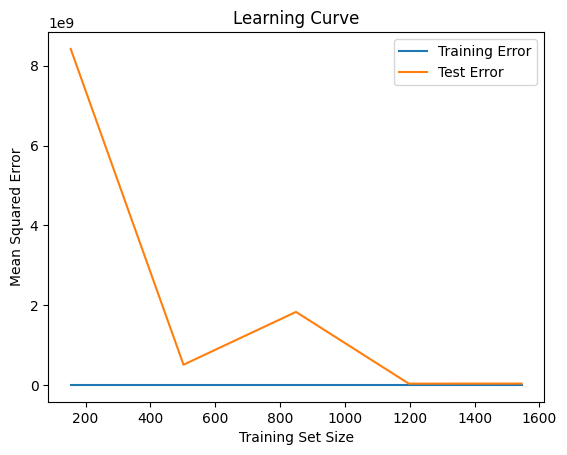

In [93]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    poly_LR, xtrain_poly_null, ytrain_null, cv=5, scoring="neg_mean_squared_error"
)

train_errors = -train_scores.mean(axis=1)
test_errors = -test_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, label="Training Error")
plt.plot(train_sizes, test_errors, label="Test Error")
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Learning Curve")
plt.show()


In [94]:
test_error = mean_squared_error(ytest_null, poly_LR.predict(xtest_poly_null))
print("Test Error:", test_error)


Test Error: 2796.7887046742203


In [95]:
from sklearn.metrics import mean_squared_error

train_error = mean_squared_error(ytrain_null, poly_LR.predict(xtrain_poly_null))
print("Training Error:", train_error)


Training Error: 2526.752042733018


In [96]:
from sklearn.linear_model import Ridge, Lasso

# Example with Ridge
ridge_model = Ridge(alpha=1.0)  # Adjust alpha (regularization strength)
ridge_model.fit(xtrain_poly_null, ytrain_null)

# Evaluate
ridge_train_mae = mean_absolute_error(ytrain_null, ridge_model.predict(xtrain_poly_null))
ridge_test_mae = mean_absolute_error(ytest_null, ridge_model.predict(xtest_poly_null))
print(f"Ridge Train MAE: {ridge_train_mae}, Ridge Test MAE: {ridge_test_mae}")


Ridge Train MAE: 41.69244326496737, Ridge Test MAE: 43.939556880550526
